In [58]:
import tensorflow as tf
import numpy as np 
import pandas as pd 


In [59]:
from keras.datasets  import cifar10
(train_img,train_label),(test_img,test_label)=cifar10.load_data()
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

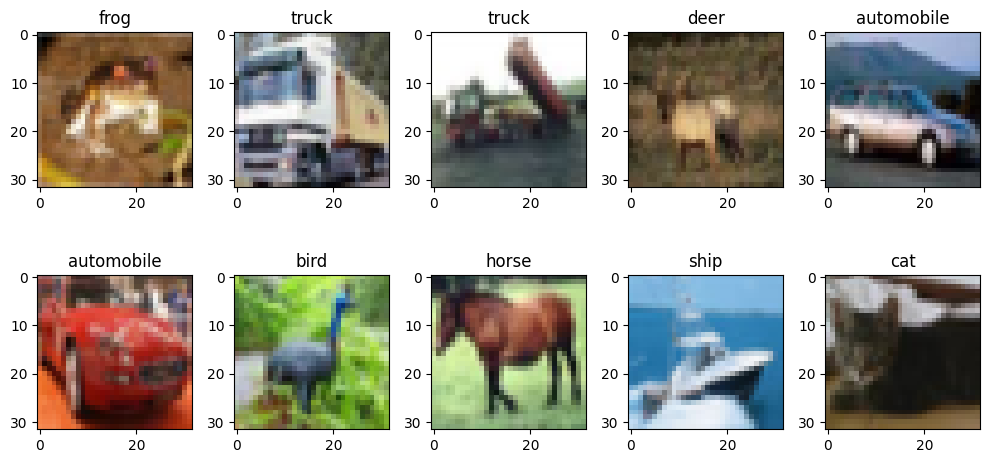

In [60]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,5))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(train_img[i])
    plt.title(cifar10_classes[train_label[i][0]])

plt.tight_layout()
plt.show()


In [61]:
print("Shape of Training image dataset:",train_img.shape)
print("Shape of Training image label:",train_label.shape)
print("Shape of Testing image dataset:",test_img.shape)
print("Shape of Testing image label:",test_label.shape)
print("Shape of image in dataset :",train_img[0].shape)

Shape of Training image dataset: (50000, 32, 32, 3)
Shape of Training image label: (50000, 1)
Shape of Testing image dataset: (10000, 32, 32, 3)
Shape of Testing image label: (10000, 1)
Shape of image in dataset : (32, 32, 3)


In [62]:
train_img=train_img.astype("float32")/255
testimg=test_img.astype("float32")/255

train_img=np.reshape(train_img,(train_img.shape[0],32*32*3))
test_img=np.reshape(test_img,(test_img.shape[0],32*32*3))

from keras.utils import to_categorical

train_label=to_categorical(train_label,num_classes=10)
test_label=to_categorical(test_label,num_classes=10)

print("Shape of Training image dataset:",train_img.shape)
print("Shape of Training image label:",train_label.shape)
print("Shape of Testing image dataset:",test_img.shape)
print("Shape of Testing image label:",test_label.shape)
print("Shape of image in dataset :",train_img[0].shape)

Shape of Training image dataset: (50000, 3072)
Shape of Training image label: (50000, 10)
Shape of Testing image dataset: (10000, 3072)
Shape of Testing image label: (10000, 10)
Shape of image in dataset : (3072,)


In [63]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from keras.optimizers import SGD
from keras.initializers import glorot_uniform,he_normal

sgd=SGD(learning_rate=0.01,decay=1e-6,momentum=0.9,nesterov=True)

Model

In [64]:
model=Sequential()
model.add(Dense(256,activation='relu',input_dim=32*32*3))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss="categorical_crossentropy",optimizer="sgd",metrics=['accuracy'])
history=model.fit(train_img,train_label,validation_split=0.1,batch_size=64,epochs=5)
loss,accuracy=model.evaluate(test_img,test_label)

print("loss:",{loss})
print("accuracy:",{accuracy})

Epoch 1/5
704/704 [==============================] - 6s 7ms/step - loss: 1.9416 - accuracy: 0.3054 - val_loss: 1.9532 - val_accuracy: 0.2858
Epoch 2/5
704/704 [==============================] - 4s 5ms/step - loss: 1.7658 - accuracy: 0.3770 - val_loss: 1.9121 - val_accuracy: 0.3112
Epoch 3/5
704/704 [==============================] - 3s 5ms/step - loss: 1.6894 - accuracy: 0.4037 - val_loss: 1.8052 - val_accuracy: 0.3536
Epoch 4/5
704/704 [==============================] - 4s 5ms/step - loss: 1.6366 - accuracy: 0.4240 - val_loss: 1.9635 - val_accuracy: 0.2934
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 512.6735 - accuracy: 0.2493
loss: {512.6735229492188}
accuracy: {0.2493000030517578}


Xavier Initialization

In [65]:
model_x=Sequential()
model_x.add(Dense(256,activation='relu',input_dim=32*32*3,kernel_initializer=glorot_uniform))
model_x.add(Dense(256,activation='relu'))
model_x.add(Dense(10,activation='softmax'))

model_x.compile(loss="categorical_crossentropy",optimizer="sgd",metrics=['accuracy'])
history_x=model_x.fit(train_img,train_label,validation_split=0.1,batch_size=64,epochs=5)
loss_x,accuracy_x=model_x.evaluate(test_img,test_label)

print("loss:",{loss_x})
print("accuracy:",{accuracy_x})

Epoch 1/5
704/704 [==============================] - 4s 6ms/step - loss: 1.9464 - accuracy: 0.3036 - val_loss: 2.0108 - val_accuracy: 0.2620
Epoch 2/5
704/704 [==============================] - 4s 6ms/step - loss: 1.7710 - accuracy: 0.3736 - val_loss: 1.8527 - val_accuracy: 0.3272
Epoch 3/5
704/704 [==============================] - 4s 6ms/step - loss: 1.6932 - accuracy: 0.4035 - val_loss: 1.7971 - val_accuracy: 0.3484
Epoch 4/5
704/704 [==============================] - 4s 5ms/step - loss: 1.6359 - accuracy: 0.4209 - val_loss: 1.8117 - val_accuracy: 0.3560
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 211.4520 - accuracy: 0.3836
loss: {211.4519805908203}
accuracy: {0.38359999656677246}


Kaiming Initialization

In [66]:
model_k=Sequential()
model_k.add(Dense(256,activation='relu',input_dim=32*32*3,kernel_initializer=he_normal))
model_k.add(Dense(256,activation='relu'))
model_k.add(Dense(10,activation='softmax'))

model_k.compile(loss="categorical_crossentropy",optimizer="sgd",metrics=['accuracy'])
history_k=model_k.fit(train_img,train_label,validation_split=0.1,batch_size=64,epochs=5)
loss_k,accuracy_k=model_k.evaluate(test_img,test_label)

print("loss:",{loss_k})
print("accuracy:",{accuracy_k})

Epoch 1/5
704/704 [==============================] - 4s 5ms/step - loss: 1.9410 - accuracy: 0.3095 - val_loss: 1.9791 - val_accuracy: 0.2782
Epoch 2/5
704/704 [==============================] - 4s 5ms/step - loss: 1.7733 - accuracy: 0.3775 - val_loss: 2.0240 - val_accuracy: 0.2932
Epoch 3/5
704/704 [==============================] - 4s 5ms/step - loss: 1.6996 - accuracy: 0.4024 - val_loss: 1.7993 - val_accuracy: 0.3622
Epoch 4/5
704/704 [==============================] - 4s 6ms/step - loss: 1.6462 - accuracy: 0.4199 - val_loss: 1.7949 - val_accuracy: 0.3520
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 169.3448 - accuracy: 0.4155
loss: {169.3448486328125}
accuracy: {0.4154999852180481}


Droupout

In [67]:
model_d=Sequential()
model_d.add(Dense(256,activation='relu',input_dim=32*32*3))
model_d.add(Dense(256,activation='relu'))
Dropout(0.3)
model_d.add(Dense(10,activation='softmax'))

model_d.compile(loss="categorical_crossentropy",optimizer="sgd",metrics=['accuracy'])
history_d=model_d.fit(train_img,train_label,validation_split=0.1,batch_size=64,epochs=5)
loss_d,accuracy_d=model_d.evaluate(test_img,test_label)

print("loss:",{loss_d})
print("accuracy:",{accuracy_d})

Epoch 1/5
704/704 [==============================] - 4s 5ms/step - loss: 1.9406 - accuracy: 0.3042 - val_loss: 2.0061 - val_accuracy: 0.2672
Epoch 2/5
704/704 [==============================] - 4s 5ms/step - loss: 1.7727 - accuracy: 0.3737 - val_loss: 1.8712 - val_accuracy: 0.3416
Epoch 3/5
704/704 [==============================] - 3s 4ms/step - loss: 1.6923 - accuracy: 0.4004 - val_loss: 1.7636 - val_accuracy: 0.3810
Epoch 4/5
 55/704 [=>............................] - ETA: 2s - loss: 1.6311 - accuracy: 0.4216

BatchNormaalization

In [ ]:
model_b=Sequential()
model_b.add(Dense(256,activation='relu',input_dim=32*32*3))
BatchNormalization()
model_b.add(Dense(256,activation='relu'))
BatchNormalization()
model_b.add(Dense(10,activation='softmax'))

model_b.compile(loss="categorical_crossentropy",optimizer="sgd",metrics=['accuracy'])
history_b=model_b.fit(train_img,train_label,validation_split=0.1,batch_size=64,epochs=5)
loss_b,accuracy_b=model_b.evaluate(test_img,test_label)

print("loss:",{loss_b})
print("accuracy:",{accuracy_b})

Epoch 1/5
704/704 [==============================] - 4s 6ms/step - loss: 1.9429 - accuracy: 0.3079 - val_loss: 1.9402 - val_accuracy: 0.2938
Epoch 2/5
704/704 [==============================] - 4s 5ms/step - loss: 1.7675 - accuracy: 0.3752 - val_loss: 1.8743 - val_accuracy: 0.3030
Epoch 3/5
704/704 [==============================] - 4s 5ms/step - loss: 1.6916 - accuracy: 0.4014 - val_loss: 1.8057 - val_accuracy: 0.3642
Epoch 4/5
704/704 [==============================] - 5s 7ms/step - loss: 1.6377 - accuracy: 0.4236 - val_loss: 1.7859 - val_accuracy: 0.3632
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 308.8723 - accuracy: 0.3120
loss: {308.872314453125}
accuracy: {0.31200000643730164}


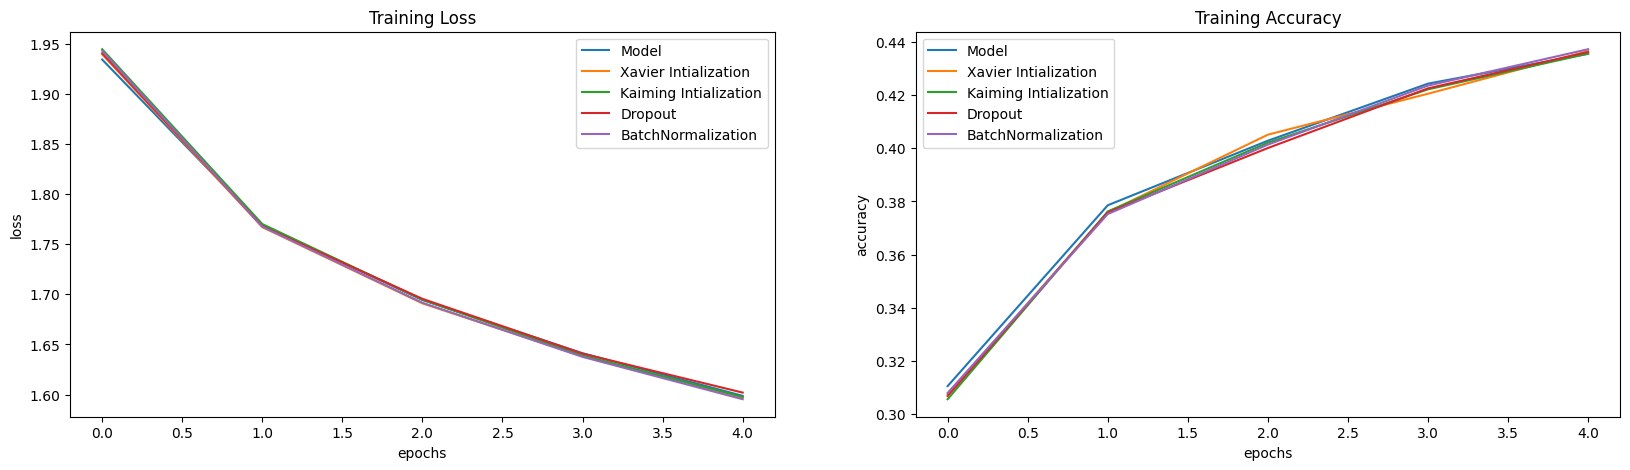

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],label="Model")
plt.plot(history_x.history['loss'],label="Xavier Intialization")
plt.plot(history_k.history['loss'],label="Kaiming Intialization")
plt.plot(history_d.history['loss'],label="Dropout")
plt.plot(history_b.history['loss'],label="BatchNormalization")
plt.title('Training Loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label="Model")
plt.plot(history_x.history['accuracy'],label="Xavier Intialization")
plt.plot(history_k.history['accuracy'],label="Kaiming Intialization")
plt.plot(history_d.history['accuracy'],label="Dropout")
plt.plot(history_b.history['accuracy'],label="BatchNormalization")
plt.title('Training Accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

In [ ]:
sample_image=test_img[20]
sample_image=np.expand_dims(sample_image,axis=0)
predictions=model.predict(sample_image)
predictions_x=model_x.predict(sample_image)
predictions_k=model_k.predict(sample_image)
predictions_d=model_d.predict(sample_image)
predictions_b=model_b.predict(sample_image)

predicted_class=np.argmax(predictions,axis=1)
predicted_class_x=np.argmax(predictions_x,axis=1)
predicted_class_k=np.argmax(predictions_k,axis=1)
predicted_class_d=np.argmax(predictions_d,axis=1)
predicted_class_b=np.argmax(predictions_b,axis=1)


print("Prediction for model without any additions:",{cifar10_classes[predicted_class[0]]})
print("Prediction for model with Xavier Intialization:",{cifar10_classes[predicted_class_x[0]]})
print("Prediction for model with Kaiming Intialization:",{cifar10_classes[predicted_class_k[0]]})
print("Prediction for model with Dropout layer:",{cifar10_classes[predicted_class_d[0]]})
print("Prediction for model with Batch Normalization:",{cifar10_classes[predicted_class_b[0]]})

1/1 [==============================] - 0s 17ms/step
Prediction for model without any additions: {'aeroplane'}
Prediction for model with Xavier Intialization: {'aeroplane'}
Prediction for model with Kaiming Intialization: {'truck'}
Prediction for model with Dropout layer: {'truck'}
Prediction for model with Batch Normalization: {'horse'}
